<a href="https://colab.research.google.com/github/Baldros/NLP-Course-HuggingFace/blob/main/2.1%20Behind_the_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apresentação:

    Aqui aprenderemos um pouco sobre a construção do método Pipeline da
    biblioteca transformers. O curso apresenta a explicação para o pytorch
    e para o tensorflow. Aqui constará a explicação para ambas as bibliotecas.

    Nesse inicio, a diferência é tão sutil, que dá para seguir de uma forma
    geral para ambos os casos até o final desse notebook.

# Por de trás do pipeline:

    Vamos começar com um exemplo completo, ando uma
    olhada no que aconteceu nos bastidores quando
    executamos o seguinte código no Capítulo 1:

In [2]:
# Importando a API pipeline:
from transformers import pipeline

In [105]:
# Exemplo utilizado:
classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [106]:
classifier(
    [
        "I've been waiting for a HuggingFace course my whole life.",
        "I hate this so much!",
    ]
)

[{'label': 'POSITIVE', 'score': 0.9598048329353333},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455}]

    Como já vimos no Capítulo 1, esse pipeline agrupa as três
    principais etapas: pré-processamento, passagem das entradas
    pelo modelo e pós-processamento. No contexto de NLP, podemos
    renomear essas três etapas como:
    
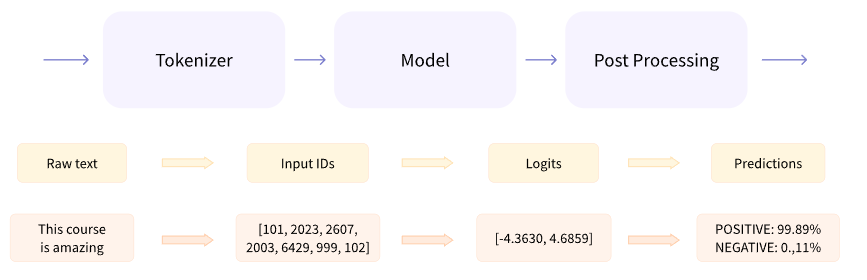

# Pré-processamento com um tokenizador:

    Assim como outras redes neurais, os modelos Transformer não podem
    processar texto bruto diretamente (não podemos esquecer que computadores
    são máquinas de fazer conta né). Portanto, a primeira etapa de nosso
    pipeline é converter as entradas de texto em números que o modelo
    possa entender. Para fazer isso, usamos um tokenizador, que será
    responsável por:

    1. Dividir a entrada em palavras, subpalavras ou símbolos (como pontuação) chamados de tokens;
    2. Mapear cada token para um inteiro;
    3. Adicionar entradas adicionais que podem ser úteis para o modelo.

    Todo esse pré-processamento precisa ser feito exatamente da mesma
    maneira que durante o pré-treinamento do modelo. Portanto, primeiro
    precisamos baixar essas informações do Model Hub. Para fazer isso,
    usamos a classe AutoTokenizer e seu método from_pretrained(). Usando
    o nome do ponto de verificação (checkpoint) do nosso modelo, ele
    buscará automaticamente os dados associados ao tokenizador do modelo
    e fará cache deles (portanto, só será baixado na primeira vez que você
    executar o código abaixo).

Nota:

    Apesar de não ficar bem explicado, eu gosto de ressaltar que tokenizadores
    também são redes neurais, basicamente, tudo aqui é rede neural, tanto
    o modelo em si, quanto os outros processos que alimentam o modelo. Eu
    gosto de ressaltar esse ponto, porque, principalmente para os iniciantes,
    isso não fica muito claro, essa parte passa-se meio batido.

Dito isso:

    Como o ponto de verificação padrão do pipeline de análise de sentimento
    é distilbert-base-uncased-finetuned-sst-2-english, executamos o seguinte:

Modelo: ttps://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english






Nota:

    A partir desse ponto começaram a aparecer as diferenças entre
    se utilizar Pytorch ou Tensorflow, como dito na aprensentação,
    irei elaborar estudar aqui as duas possibilidade. É bem simples,
    no nivel que estamos estudando, não há muita diferença.

**Com o Pytorch**

In [5]:
# Importando Tokenizador:
from transformers import AutoTokenizer

In [48]:
# Definindo o modelo a ser utilizado - A arquitetura e os pesos:
checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"

In [26]:
# Instanciando o modelo:
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

    Depois de obtermos o tokenizador, podemos passar diretamente nossas
    sentenças para ele e receberemos de volta um dicionário pronto para
    alimentar nosso modelo! A única coisa que resta fazer é converter a
    lista de IDs de entrada em tensores.

    Para especificar o tipo de tensores que queremos receber de volta
    (PyTorch, TensorFlow ou NumPy puro), usamos o argumento return_tensors:

In [38]:
# Tokenizando:
raw_inputs = [
    "I've been waiting for a HuggingFace course my whole life.",
    "I hate this so much!",
]
# Realizando a inferência
inputs_torch = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="pt") #pt == Pytorch

In [39]:
# Como o retorno é um dicionário:
print(inputs_torch.keys())

dict_keys(['input_ids', 'attention_mask'])


In [40]:
# Retornando os elementos do Dicionário:
print(inputs_torch['input_ids'])
print(inputs_torch['attention_mask'])

tensor([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,
          2607,  2026,  2878,  2166,  1012,   102],
        [  101,  1045,  5223,  2023,  2061,  2172,   999,   102,     0,     0,
             0,     0,     0,     0,     0,     0]])
tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]])


**Realizando a inferência**

    Realizar a inferência do modelo refere-se ao processo de usar um
    modelo treinado para fazer previsões ou gerar saídas com base em
    dados de entrada. Essa é uma nomenclatura específica para chamar
    as predições feitas por modelos pré-treinados.
    
    Essa linguagem serve para qualquer tipo de biblioteca que se esteja
    utilizando como suporte para a API do transformer.

**Com o Tensorflow**

In [23]:
raw_inputs = [
    "I've been waiting for a HuggingFace course my whole life.",
    "I hate this so much!",
]

# Realizando a inferência
inputs_tf = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="tf") # tf == tensorflow

In [24]:
# Como o retorno é um dicionário:
print(inputs_tf.keys())

dict_keys(['input_ids', 'attention_mask'])


In [25]:
# Retornando os elementos do Dicionário:
print(inputs_tf['input_ids'])
print(inputs_tf['attention_mask'])

tf.Tensor(
[[  101  1045  1005  2310  2042  3403  2005  1037 17662 12172  2607  2026
   2878  2166  1012   102]
 [  101  1045  5223  2023  2061  2172   999   102     0     0     0     0
      0     0     0     0]], shape=(2, 16), dtype=int32)
tf.Tensor(
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]], shape=(2, 16), dtype=int32)


**Onde, para ambos os casos:**

    1. 'input_ids': São os identificadores numéricos únicos associados
    a cada token no vocabulário do modelo. Cada número inteiro representa
    um token específico. No exemplo fornecido, os números epresentam os
    tokens em inglês correspondentes às palavras nas frases originais.
    O token especial [CLS] (101) é adicionado no início de cada sequência,
    e [SEP] (102) é adicionado ao final. Tokens adicionais são preenchidos
    com zeros à direita para alinhar as sequências, devido ao parâmetro
    padding=True.

    2. 'attention_mask': São os elementos da sequência são tokens reais
    e quais são tokens de preenchimento. Um valor de 1 indica que o token
    na posição correspondente em 'input_ids' é um token real, enquanto um
    valor de 0 indica que é um token de preenchimento. Isso é útil para
    garantir que o modelo leve em consideração apenas os tokens relevantes
    durante o processamento.

    Note que a diferença de se utilizar pytorch para tensorflow
    é realmente muito pouca. O tensorflow da um pouquinho mais
    de informação mais é bobagem.

In [28]:
# Tensorflow:
inputs_tf

{'input_ids': <tf.Tensor: shape=(2, 16), dtype=int32, numpy=
array([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662,
        12172,  2607,  2026,  2878,  2166,  1012,   102],
       [  101,  1045,  5223,  2023,  2061,  2172,   999,   102,     0,
            0,     0,     0,     0,     0,     0,     0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(2, 16), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)>}

In [29]:
# Pytorch
inputs_torch

{'input_ids': tensor([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,
          2607,  2026,  2878,  2166,  1012,   102],
        [  101,  1045,  5223,  2023,  2061,  2172,   999,   102,     0,     0,
             0,     0,     0,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]])}

**Tensores**

    Você pode usar 🤗 Transformers sem se preocupar com qual framework de
    ML está sendo usado como backend; pode ser PyTorch, TensorFlow ou Flax
    para alguns modelos. No entanto, modelos Transformer aceitam apenas
    tensores como entrada. Se esta for a primeira vez que você ouve falar
    sobre tensores, pode pensar neles como arrays NumPy. Um array NumPy pode
    ser um escalar (0D), um vetor (1D), uma matriz (2D) ou ter mais dimensões.
    como tensores (3D). Efetivamente, é um tensor; os tensores de outros
    frameworks de ML se comportam de maneira semelhante e geralmente são tão
    simples de instanciar quanto arrays NumPy.

Nota:

    A ideia de tensor da Matemática é um pouco diferente da ideia de tensor
    de Machine Learning, não vou aqui abordar muito esse tema, até porque
    nem eu entendo exatamente bem a diferença entre ambos. Basta dizer que
    aqui estamos nos baseando na definição de tensores utilizadas em ML.

# Passando pelo modelo

    Aqui de fato a aparecer umas diferenças mais profundas entre
    a utilização de bibliotecas diferentes de ML. De fato aqui,
    até o modelo é diferente. Dito isso, Podemos baixar nosso modelo
    pré-treinado da mesma forma que fizemos com nosso tokenizador.
    🤗 Transformers fornece uma classe AutoModel/TFAutoModel que
    também possui um método from_pretrained:

**Com o Pytorch**

In [52]:
# API para o Pytorch:
from transformers import AutoModel

In [57]:
# Instanciando modelo:
model_torch = AutoModel.from_pretrained(checkpoint)

**Com o Tensorflow**

In [54]:
# API para o Tensorflow:
from transformers import TFAutoModel

In [55]:
# Instanciando o modelo:
model_tf = TFAutoModel.from_pretrained(checkpoint)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['pre_classifier.weight', 'classifier.bias', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Utilizando o mesmo conjunto de pesos:

    Neste trecho de código, baixamos o mesmo ponto de verificação (checkpoint)
    ou seja, o nosso conjunto de pesos que usamos em nosso pipeline anterior
    (ele deveria ter sido armazenado em cache) e instanciamos um modelo com ele.

    Esta arquitetura contém apenas o módulo Transformer base: dadas algumas
    entradas, ela gera o que chamaremos de estados ocultos (hidden states),
    também conhecidos como características (features). Para cada entrada do
    modelo, recuperaremos um vetor de alta dimensão representando a compreensão
    contextual dessa entrada pelo modelo Transformer.

    Se isso não fizer sentido, não se preocupe. Explicaremos tudo mais tarde.

    Embora esses estados ocultos possam ser úteis por si só, geralmente são
    entradas para outra parte do modelo, conhecida como a cabeça (head).
    No Capítulo 1, as diferentes tarefas poderiam ter sido realizadas com
    a mesma arquitetura, mas cada uma dessas tarefas terá uma cabeça (head)
    diferente associada.
    
Um vetor de alta dimensão?

    O vetor gerado pelo módulo Transformer geralmente é grande. Geralmente,
    ele tem três dimensões, por isso ele é e precisa ser um tensor:

    1. Tamanho do lote (batch size): O número de sequências processadas
    de uma vez (2 em nosso exemplo);
    2. Comprimento da sequência (sequence length): O comprimento da
    representação numérica da sequência (16 em nosso exemplo);
    3. Tamanho oculto (hidden size): A dimensão do vetor de cada entrada
    do modelo.

    É chamado de "alta dimensão" por causa do último valor. O tamanho
    oculto pode ser muito grande (768 é comum para modelos menores, e
    em modelos maiores isso pode chegar a 3072 ou mais).

    Podemos ver isso se alimentarmos as entradas que pré-processamos em
    nosso modelo:

**Com o Pytorch**

In [58]:
# Realizando a inferência do modelo
outputs_torch = model_torch(**inputs_torch)
print(outputs_torch.last_hidden_state.shape)

torch.Size([2, 16, 768])


    Note que aqui tem uma diferença... Porque no pytorch entra
    esse elemento ** no parâmetro. O uso do duplo asterisco (**)
    em Python é conhecido como "desempacotamento de dicionário" ou
    "argumentos de palavras-chave arbitrários". Ele é usado para
    passar um dicionário como argumentos de palavra-chave para uma
    função.

**Com o Tensorflow**

In [59]:
# Realizando a inferência do modelo
outputs_tf = model_tf(inputs_tf)
print(outputs_tf.last_hidden_state.shape)

(2, 16, 768)


    Note que no caso do tensorflow, não há a necessidade de
    se "desempacotar o dicionário".

Nota:

    Observe que as saídas dos modelos 🤗 Transformers se comportam como
    namedtuples ou dicionários. Você pode acessar os elementos por atributos
    (como fizemos) ou por chave (outputs["last_hidden_state"]), ou até mesmo
    por índice se souber exatamente onde está o que está procurando (outputs[0]).

# Model Heads: Entendendo os números

    As cabeças do modelo (Model Heads) recebem o vetor de alta dimensão
    dos estados ocultos como entrada e os projetam em uma dimensão diferente.
    Geralmente, são compostas por uma ou algumas camadas lineares:

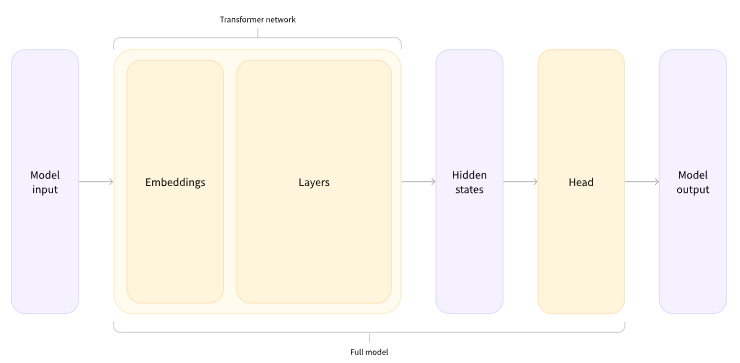

    A saída do modelo Transformer é enviada diretamente para a cabeça do
    modelo (head) para ser processada.

    Neste diagrama, o modelo é representado por sua camada de embeddings e
    pelas camadas subsequentes. A camada de embeddings converte cada ID de
    entrada na entrada tokenizada em um vetor que representa o token associado.
    As camadas subsequentes manipulam esses vetores usando o mecanismo de
    atenção (self-attention) para produzir a representação final das sentenças.

    Existem muitas arquiteturas diferentes disponíveis em 🤗 Transformers,
    cada uma projetada para enfrentar uma tarefa específica. Aqui está uma
    lista não exaustiva:

**Model (recupera os hidden states)**

    Esta classe é geralmente utilizada para recuperar os estados ocultos
    de um modelo Transformer, ou seja, as representações intermediárias
    geradas durante o processamento de uma sequência de entrada. É útil
    para análises mais avançadas e tarefas personalizadas que podem
    exigir acesso a esses estados.

**ForCausalLM**

    Projetado para modelos de linguagem causais, este tipo de classe é
    usado para tarefas em que a predição de uma palavra depende apenas
    das palavras anteriores na sequência. Geralmente, é útil em geração
    de texto onde a ordem das palavras é crucial.

**ForMaskedLM**

    Essa classe é específica para modelos de linguagem com máscara, como
    o BERT. É utilizada em tarefas onde parte da sequência de entrada é
    mascarada, e o modelo é treinado para prever as palavras mascaradas
    com base no contexto circundante.

**ForMultipleChoice**

    Projetado para tarefas de escolha múltipla, este tipo de classe é
    útil quando várias opções são fornecidas e o modelo deve escolher
    a melhor resposta com base na informação contida na sequência de entrada.

**ForQuestionAnswering**

    Especialmente adaptado para tarefas de Perguntas e Respostas (Q&A),
    esta classe é projetada para localizar e fornecer respostas relevantes
    dentro de uma sequência de texto, dada uma pergunta.

**ForSequenceClassification**

    Esta classe é usada para tarefas de classificação de sequência, como
    atribuir uma etiqueta ou categoria a uma sequência de entrada. É
    comumente usado em tarefas de análise de sentimento, onde o objetivo
    é classificar o sentimento de um texto como positivo, negativo ou neutro.

**ForTokenClassification**

    Projetado para tarefas de classificação de tokens, essa classe é usada
    quando é necessário atribuir uma etiqueta a cada token em uma sequência.
    É comumente usado em tarefas como reconhecimento de entidades nomeadas
    (NER), onde o objetivo é identificar e classificar entidades específicas
    em um texto.Dentre outros...

Dito isso:

    Para nosso exemplo, precisaremos de um modelo com uma cabeça
    de classificação de sequência (para ser capaz de classificar as
    sentenças como positivas ou negativas). Portanto, na verdade,
    não usaremos a classe AutoModel, mas AutoModelForSequenceClassification:


**Com o Pytorch**

In [63]:
# API para o Pytorch:
from transformers import AutoModelForSequenceClassification

In [66]:
# Instanciando o modelo:
model_torch = AutoModelForSequenceClassification.from_pretrained(checkpoint)

# Realizando a inferência:
outputs_torch = model_torch(**inputs_torch)
print(outputs_torch)

SequenceClassifierOutput(loss=None, logits=tensor([[-1.5607,  1.6123],
        [ 4.1692, -3.3464]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)


In [68]:
print(outputs_torch.logits.shape)

torch.Size([2, 2])


**Com o Tensorflow**

In [69]:
# API para o Tensorflow:
from transformers import TFAutoModelForSequenceClassification

In [73]:
# Instanciando o modelo:
model_tf = TFAutoModelForSequenceClassification.from_pretrained(checkpoint)

# Realizando a inferência:
outputs_tf = model_tf(inputs_tf)

All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


In [72]:
print(outputs_tf)

TFSequenceClassifierOutput(loss=None, logits=<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-1.5606961,  1.6122813],
       [ 4.1692314, -3.3464477]], dtype=float32)>, hidden_states=None, attentions=None)


In [74]:
print(outputs_tf.logits.shape)

(2, 2)


    Vemos que para ambos os casos, o resultado foi o mesmo, como era
    de se esperar. Errado seria se não fosse. como temos apenas duas
    sentenças e duas etiquetas, o resultado que obtemos do nosso modelo
    tem uma forma de 2 x 2.

# Pós-processamento da saída:

    Os valores que obtemos como saída do nosso modelo não fazem
    sentido necessariamente por si só. Vamos dar uma olhada:


In [76]:
# Utilizando pytorch:
print(outputs_torch.logits)

tensor([[-1.5607,  1.6123],
        [ 4.1692, -3.3464]], grad_fn=<AddmmBackward0>)


In [77]:
# Utilizando Tensorflow:
print(outputs_tf.logits)

tf.Tensor(
[[-1.5606961  1.6122813]
 [ 4.1692314 -3.3464477]], shape=(2, 2), dtype=float32)


    Nosso modelo previu [-1.5607, 1.6123] para a primeira sentença e
    [4.1692, -3.3464] para a segunda. Esses não são probabilidades, mas
    logitos, os escores brutos e não normalizados produzidos pela última
    camada do modelo. Para serem convertidos em probabilidades, eles precisam
    passar por uma camada SoftMax (todos os modelos 🤗 Transformers geram os
    logitos, já que a função de perda para treinamento geralmente incorpora
    a última função de ativação, como o SoftMax, com a própria função de
    perda, como entropia cruzada):

**Com o Pytorch**

In [79]:
# Importando o Pytorch
import torch

In [81]:
# Aplicando a função ativação:
predictions_torch = torch.nn.functional.softmax(outputs_torch.logits, dim=-1)

print(predictions_torch)

tensor([[4.0195e-02, 9.5980e-01],
        [9.9946e-01, 5.4418e-04]], grad_fn=<SoftmaxBackward0>)


**Com o Tensorflow**

In [82]:
# Importando o Tensorflow:
import tensorflow as tf

In [83]:
# Aplicando a função ativação:
predictions_tf = tf.math.softmax(outputs_tf.logits, axis=-1)
print(predictions_tf)

tf.Tensor(
[[4.0195391e-02 9.5980465e-01]
 [9.9945587e-01 5.4418371e-04]], shape=(2, 2), dtype=float32)


A importancia de importar as dependências:

    A função ativação é parte essêncial de uma rede neural que faça
    predições no campo da classificação, que é o nosso caso aqui, e
    que para que seja possivel ser aplicada, precisamos utilizar um
    método de alguma das bibliotecas. Isso é importante de ser ressaltado
    para enteder como fazer isso na prática.

Dito isso:
   
    Agora podemos ver que o modelo previu [0.0402, 0.9598] para a
    primeira sentença e [0.9995, 0.0005] para a segunda. Essas são
    pontuações de probabilidade reconhecíveis.

    Para obter as etiquetas correspondentes a cada posição, podemos
    inspecionar o atributo id2label da configuração do modelo (mais
    sobre isso na próxima seção):

**Com o Pytorch**

In [98]:
# Pytorch:
labels_torch = model_torch.config.id2label;labels_torch

{0: 'NEGATIVE', 1: 'POSITIVE'}

In [99]:
def classify_labels_torch(predictions, labels):
    """
    Classifica os rótulos com base nas previsões do modelo.

    Args:
    - predictions: Tensor contendo as previsões do modelo após a aplicação da função softmax.
    - labels: Mapeamento de IDs para rótulos (ex: model_torch.config.id2label).

    Returns:
    - Lista de rótulos classificados para cada entrada.
    """

    # Obtém o índice do rótulo com a probabilidade mais alta para cada entrada.
    predicted_indices = torch.argmax(predictions, dim=-1).numpy()

    # Mapeia os índices para os rótulos usando o dicionário de id2label.
    predicted_labels = [labels[idx] for idx in predicted_indices]

    print(f'Temos então que para a primeira entrada a classficação foi {predicted_labels[0]} e para a segunda entrada temos {predicted_labels[1]}')

    return predicted_labels

In [100]:
_ = classify_labels_torch(predictions_torch,labels_torch)

Temos então que para a primeira entrada a classficação foi POSITIVE e para a segunda entrada temos NEGATIVE


**Com o Tensorflow**

In [101]:
# Tensorflow:
labels_tf = model_tf.config.id2label;labels_tf

{0: 'NEGATIVE', 1: 'POSITIVE'}

In [102]:
def classify_labels_tf(predictions, labels):
    """
    Classifica os rótulos com base nas previsões do modelo.

    Args:
    - predictions: Tensor contendo as previsões do modelo após a aplicação da função softmax.
    - labels: Mapeamento de IDs para rótulos (ex: model_torch.config.id2label).

    Returns:
    - Lista de rótulos classificados para cada entrada.
    """

    # Obtém o índice do rótulo com a probabilidade mais alta para cada entrada.
    predicted_indices = tf.argmax(predictions, axis=-1).numpy()

    # Mapeia os índices para os rótulos usando o dicionário de id2label.
    predicted_labels = [labels[idx] for idx in predicted_indices]

    print(f'Temos então que para a primeira entrada a classificação foi {predicted_labels[0]} e para a segunda entrada temos {predicted_labels[1]}')

    return predicted_labels

In [103]:
_ = classify_labels_tf(predictions_tf,labels_tf)

Temos então que para a primeira entrada a classificação foi POSITIVE e para a segunda entrada temos NEGATIVE
